In [31]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['figure.figsize'] = (16, 6)

In [32]:
with open('data/2020-anteriores/ordesa.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

In [33]:
gpx

GPX(tracks=[GPXTrack(name='Monte Perdido desde Pradera de Ordesa (por Faja de Canarello...', segments=[GPXTrackSegment(points=[...])])])

In [34]:
gpx.get_track_points_no()

1118

In [35]:
gpx.get_elevation_extremes()

MinimumMaximum(minimum=1329.449, maximum=3339.55)

In [36]:
gpx.get_uphill_downhill()

UphillDownhill(uphill=2365.6863999999973, downhill=2365.978399999998)

In [37]:
len(gpx.tracks)

1

In [38]:
len(gpx.tracks[0].segments)

1

In [39]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })

In [40]:
route_df = pd.DataFrame(route_info)
route_df.head()

,latitude,longitude,elevation
0,42.649574,-0.060582,1330.247
1,42.649588,-0.059589,1330.329
2,42.649413,-0.059038,1330.921
3,42.649305,-0.058027,1335.608
4,42.649197,-0.057642,1336.557


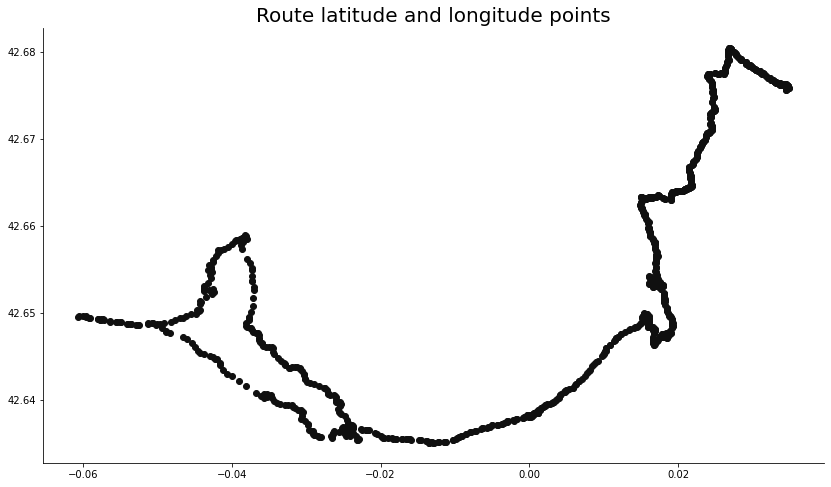

In [41]:
plt.figure(figsize=(14, 8))
plt.scatter(route_df['longitude'], route_df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

In [42]:
import folium

from IPython.display import display

In [43]:
route_map = folium.Map(
    location=[route_df['latitude'][gpx.get_track_points_no()//4], route_df['longitude'][gpx.get_track_points_no()//4]],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)
display(route_map)

In [44]:
route_map = folium.Map(
    location=[route_df['latitude'][gpx.get_track_points_no()//4], route_df['longitude'][gpx.get_track_points_no()//4]],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

for _, row in route_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
    ).add_to(route_map)

display(route_map)

In [45]:
route_map = folium.Map(
    location=[route_df['latitude'][gpx.get_track_points_no()//4], route_df['longitude'][gpx.get_track_points_no()//4]],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)

In [46]:
route_map = folium.Map(
    location=[route_df['latitude'][gpx.get_track_points_no()//4], route_df['longitude'][gpx.get_track_points_no()//4]],
    zoom_start=13,
    tiles='CartoDBPositron',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)

In [47]:
route_map = folium.Map(
    location=[route_df['latitude'][gpx.get_track_points_no()//4], route_df['longitude'][gpx.get_track_points_no()//4]],
    zoom_start=13,
    tiles='Stamen Terrain',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)

In [48]:
import numpy as np
import haversine as hs

In [49]:
route_df['elevation_diff'] = route_df['elevation'].diff()

route_df.head()

,latitude,longitude,elevation,elevation_diff
0,42.649574,-0.060582,1330.247,NaN
1,42.649588,-0.059589,1330.329,0.082
2,42.649413,-0.059038,1330.921,0.592
3,42.649305,-0.058027,1335.608,4.687
4,42.649197,-0.057642,1336.557,0.949


In [50]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1, lon1),
        point2=(lat2, lon2),
        unit=hs.Unit.METERS
    )
    return np.round(distance, 2)

In [51]:
haversine_distance(
    lat1=route_df.iloc[0]['latitude'],
    lon1=route_df.iloc[0]['longitude'],
    lat2=route_df.iloc[1]['latitude'],
    lon2=route_df.iloc[1]['longitude']
)

81.23

In [52]:
distances = [np.nan]

for i in range(len(route_df)):
    if i == 0:
        continue
    else:
        distances.append(haversine_distance(
            lat1=route_df.iloc[i - 1]['latitude'],
            lon1=route_df.iloc[i - 1]['longitude'],
            lat2=route_df.iloc[i]['latitude'],
            lon2=route_df.iloc[i]['longitude']
        ))
        
route_df['distance'] = distances
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance
0,42.649574,-0.060582,1330.247,NaN,NaN
1,42.649588,-0.059589,1330.329,0.082,81.23
2,42.649413,-0.059038,1330.921,0.592,49.09
3,42.649305,-0.058027,1335.608,4.687,83.55
4,42.649197,-0.057642,1336.557,0.949,33.70


In [53]:
route_df[route_df['elevation_diff'] >= 0]['elevation_diff'].sum()

2774.4829999999984

In [54]:
route_df['distance'].sum()

33546.84

In [55]:
route_df['cum_elevation'] = route_df['elevation_diff'].cumsum()
route_df['cum_distance'] = route_df['distance'].cumsum()

route_df.head()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance
0,42.649574,-0.060582,1330.247,NaN,NaN,NaN,NaN
1,42.649588,-0.059589,1330.329,0.082,81.23,0.082,81.23
2,42.649413,-0.059038,1330.921,0.592,49.09,0.674,130.32
3,42.649305,-0.058027,1335.608,4.687,83.55,5.361,213.87
4,42.649197,-0.057642,1336.557,0.949,33.70,6.310,247.57


In [56]:
route_df = route_df.fillna(0)

route_df.head()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance
0,42.649574,-0.060582,1330.247,0.000,0.00,0.000,0.00
1,42.649588,-0.059589,1330.329,0.082,81.23,0.082,81.23
2,42.649413,-0.059038,1330.921,0.592,49.09,0.674,130.32
3,42.649305,-0.058027,1335.608,4.687,83.55,5.361,213.87
4,42.649197,-0.057642,1336.557,0.949,33.70,6.310,247.57


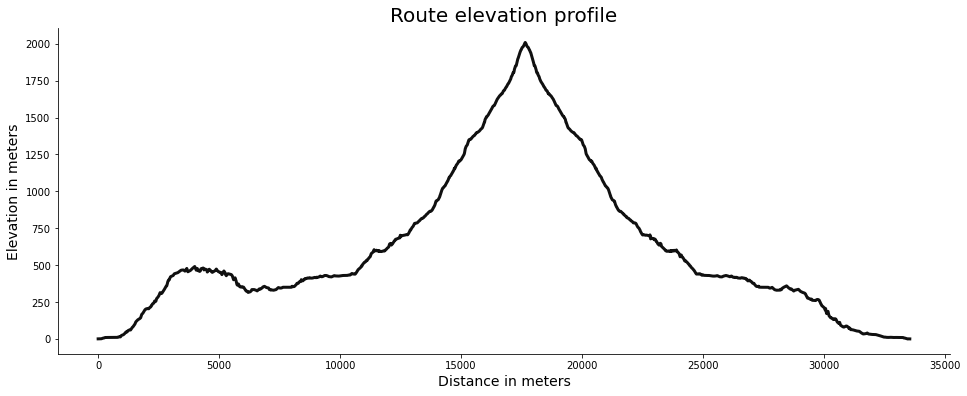

In [57]:
plt.plot(route_df['cum_distance'], route_df['cum_elevation'], color='#101010', lw=3)
plt.title('Route elevation profile', size=20)
plt.xlabel('Distance in meters', size=14)
plt.ylabel('Elevation in meters', size=14);

In [58]:
route_map = folium.Map(
    location=[route_df['latitude'][gpx.get_track_points_no()//4], route_df['longitude'][gpx.get_track_points_no()//4]],
    zoom_start=13,
    tiles='Stamen Terrain',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

display(route_map)

In [59]:
import pathlib

In [63]:
route_map = folium.Map(
    location=[route_df['latitude'][gpx.get_track_points_no()//4], route_df['longitude'][gpx.get_track_points_no()//4]],
    zoom_start=13,
    tiles='Stamen Terrain',
    width=1024,
    height=600
)

for file in pathlib.Path('data').rglob('*.gpx'):
    try:
        gpx = gpxpy.parse(open(file, 'r'))
        route_info = []

        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    route_info.append({
                        'latitude': point.latitude,
                        'longitude': point.longitude,
                        'elevation': point.elevation
                    })
        route_df = pd.DataFrame(route_info)

        coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
        folium.PolyLine(coordinates, weight=6).add_to(route_map)
    except Exception:
        print('Error parsing file:', file.stem)
    
display(route_map)

Error parsing file: tejeda-de-tosande-el-bosque-milenario-parque-natural-fuentes
Error parsing file: tejeda-tosande
Error parsing file: tejeda-tosande_500
